# Bellabeat Case Study
End-to-end business case analysis with a goal of extracting insights from real world Healthtech customer data from a one of the high growth company called [Bellabeat](https://bellabeat.com/).

## Introduction
Leading Silicon Valley fem-tech business, targeting health-conscious women globally. 

Bellabeat creates beautiful, innovative products that help women to easily track their overall health and get connected to their body and mind throughout different stages in life.

Women’s health has always been our priority. Through beautifully designed technology we aim to inform, motivate and inspire women around the world. Inspire them to be healthier, happier and more conscious and become the best version of themselves. As each person is unique and different, we apply that belief to the products we create offering a completely personalized experience.

If you’re looking for a wearable to motivate you to be more active, track your calories and log your sleep patterns, Bellabeat is a choice for you. Our Bellabeat app is constantly growing in content we offer, as well as connecting all of our products into the perfect wellness experience.

## Purpose
The purpose of this notebook is to identify patterns in the data and try to formulate a strategy that could benefit how the companies approach their products in the marketing perspective.

In [312]:
# Import the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [399]:
# Aggregated data (daily)
daily_Activity = pd.read_csv(os.path.join('../data/', 'dailyActivity_merged.csv'))

# Calories
calories_hourly = pd.read_csv(os.path.join('../data/', 'hourlyCalories_merged.csv'))
calories_minute = pd.read_csv(os.path.join('../data/', 'minuteCaloriesNarrow_merged.csv'))

# Intensities
intensities_hourly = pd.read_csv(os.path.join('../data/', 'hourlyIntensities_merged.csv'))
intensities_minute = pd.read_csv(os.path.join('../data/', 'minuteIntensitiesNarrow_merged.csv'))

# Steps
step_hourly = pd.read_csv(os.path.join('../data/', 'hourlySteps_merged.csv'))
step_minute = pd.read_csv(os.path.join('../data/', 'minuteStepsNarrow_merged.csv'))

# Sleep
sleep_daily = pd.read_csv(os.path.join('../data/', 'sleepDay_merged.csv'))
sleep_minute = pd.read_csv(os.path.join('../data/', 'minuteSleep_merged.csv'))

# Metabolic Equivalent of Task (MET)
met_minute = pd.read_csv(os.path.join('../data/', 'minuteMETsNarrow_merged.csv'))

# Weight
weight_log = pd.read_csv(os.path.join('../data/', 'weightLogInfo_merged.csv'))

# Heart Rate per second
heart_rate_second = pd.read_csv(os.path.join('../data/', 'heartrate_seconds_merged.csv'))

# Unused data
#df2 = pd.read_csv(os.path.join('../data/', 'dailyCalories_merged.csv'))
#df3 = pd.read_csv(os.path.join('../data/', 'dailyIntensities_merged.csv'))
#df4 = pd.read_csv(os.path.join('../data/', 'dailySteps_merged.csv'))
#df10 = pd.read_csv(os.path.join('../data/', 'minuteCaloriesWide_merged.csv'))
#df12 = pd.read_csv(os.path.join('../data/', 'minuteIntensitiesWide_merged.csv'))
#df16 = pd.read_csv(os.path.join('../data/', 'minuteStepsWide_merged.csv'))

### Unused Data
I will not be using *dailyCalories_merged*, *dailyIntensities_merged*, *dailySteps_merged* since the information have been aggregated to the "*dailyActivity_merged*".

For the *minuteCaloriesWide_merged*, *minuteIntensitiesWide_merged*, and *minuteStepsWide_merged*, it is basically the wide type data frame of the *minuteCaloriesNarrow_merged*, *minuteIntensitiesNarrow_merged*, and *minuteStepsNarrow_merged* respectively.

## Exploratory Data Analysis I (EDA)
For the first part of the analysis, I will be going over the high-level analysis on the user data. We are going to analyze the less complex **daily** data and try to extract some patterns that might emerge.

*Note that the more specific the time frame is (from daily, hourly, to minute), the more uncertain the data will be.*

In [314]:
print("daily_Activity has", len(daily_Activity["Id"].unique()), "unique users Id")
print("sleep_daily has", len(sleep_daily["Id"].unique()), "unique users Id")

daily_Activity has 33 unique users Id
sleep_daily has 24 unique users Id


There will be some missing data when joining these two data frames together.

In [315]:
# remove hour timestamp from the values
for i in range (sleep_daily.shape[0]):
    sleep_daily.iloc[i,1] = sleep_daily.iloc[i,1].split()[0]

# rename before merging
sleep_daily = sleep_daily.rename(columns={"SleepDay": "ActivityDate"})

In [316]:
# join all the daily features into one data frame
da_complete = daily_Activity.merge(sleep_daily, on=["Id", "ActivityDate"], how="left")
da_complete.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0


In [317]:
column_names = list(da_complete.columns.values)

col_desc = ["User ID", "Date of the activity", "Total steps recorded by the app", "Total distance recorded by the app",
            "Total distance recorded by the app (same as TotalDistance)", "LoggedActivitiesDistance",
            "Distances in which the user is most active", "Distances in which the user is moderately active",
            "Distances in which the user is lightly active", "Distances in which the user is at sedentary period",
            "Time in which the user is most active", "Time in which the user is fairly active",
            "Time in which the user is lightly active", "Time in which the user is at sedentary period",
            "Calories burned", "Sleep count in a day", "Total time asleep (in minutes)", 
            "Total time in bed"]
pd.DataFrame({"Column Name":column_names, 
              "Column Descriptions":col_desc})

,Column Name,Column Descriptions
0,Id,User ID
1,ActivityDate,Date of the activity
2,TotalSteps,Total steps recorded by the app
3,TotalDistance,Total distance recorded by the app
4,TrackerDistance,Total distance recorded by the app (same as To...
5,LoggedActivitiesDistance,LoggedActivitiesDistance
6,VeryActiveDistance,Distances in which the user is most active
7,ModeratelyActiveDistance,Distances in which the user is moderately active
8,LightActiveDistance,Distances in which the user is lightly active
9,SedentaryActiveDistance,Distances in which the user is at sedentary pe...


I decided to drop "*TrackerDistance*" since it is only the copy of "*TotalDistance*" feature.\
I also drop the "*LoggedActivitiesDistance*" because of its lack of significance (too much data records 0), indicating people don't use this feature quite often.

In [318]:
# summary statistics of each feature
da_complete.drop(["Id", "TrackerDistance", "LoggedActivitiesDistance"], axis=1).describe()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,413.000000,413.000000,413.000000
mean,7652.188759,5.502853,1.504316,0.570880,3.349258,0.001601,21.239661,13.628844,193.025451,990.353128,2307.507953,1.118644,419.467312,458.639225
std,5086.532832,3.926509,2.657626,0.884775,2.046505,0.007335,32.946264,20.000746,109.308468,301.262473,720.815522,0.345521,118.344679,127.101607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,61.000000
25%,3795.000000,2.620000,0.000000,0.000000,1.950000,0.000000,0.000000,0.000000,127.000000,729.000000,1829.500000,1.000000,361.000000,403.000000
50%,7439.000000,5.260000,0.220000,0.240000,3.380000,0.000000,4.000000,7.000000,199.000000,1057.000000,2140.000000,1.000000,433.000000,463.000000
75%,10734.000000,7.720000,2.065000,0.805000,4.790000,0.000000,32.000000,19.000000,264.000000,1229.000000,2796.500000,1.000000,490.000000,526.000000
max,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F6C600820>,
      dtype=object)

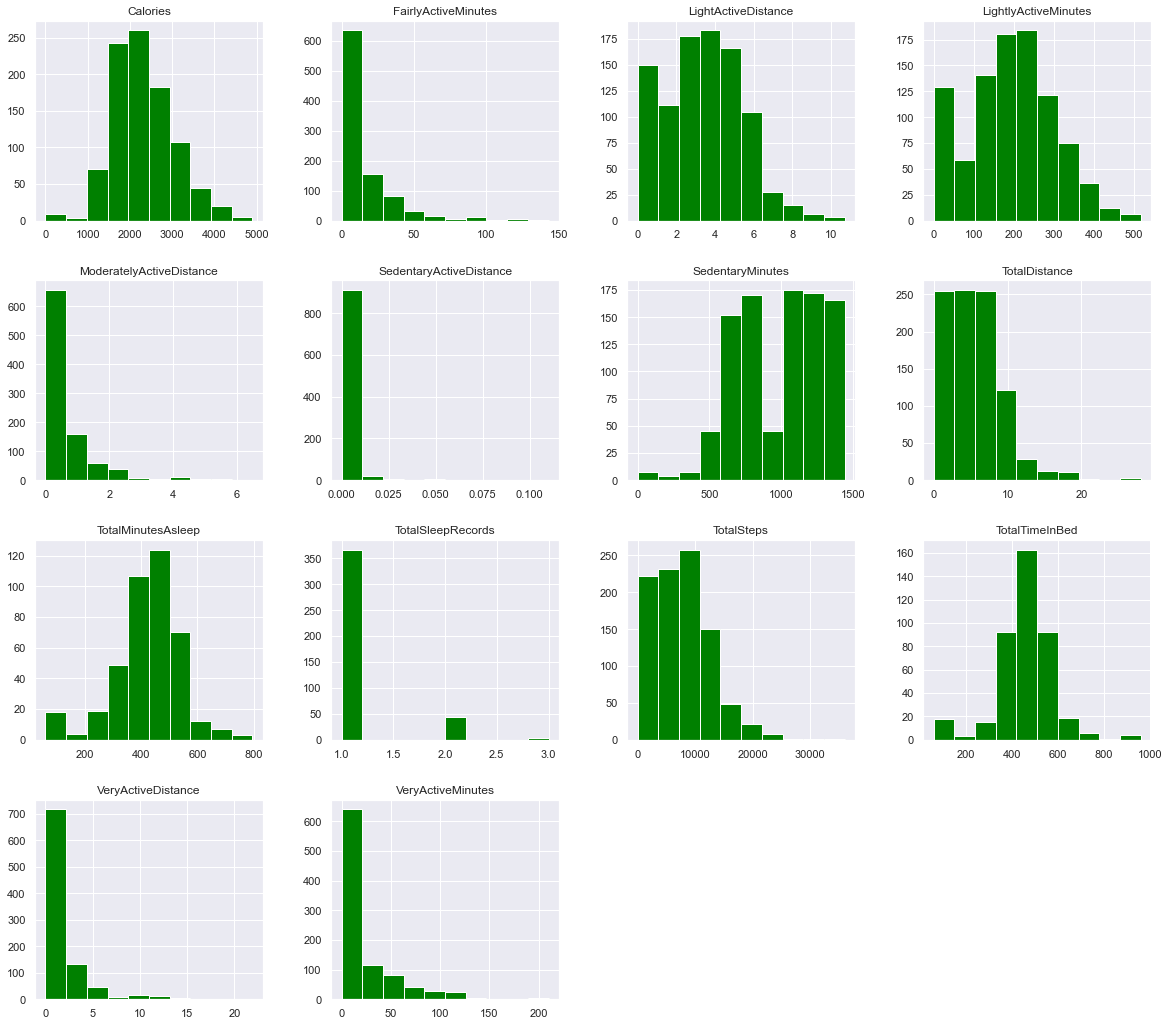

In [319]:
# quick visualize of each feature
da_complete.drop(["Id", "TrackerDistance", "LoggedActivitiesDistance"], axis=1).hist(figsize=(20,18), color="green")

### Insights to Bellabeat Users
- In terms of user's total steps, the average of steps recorded is 7652 steps with median of 7439 steps. Looking at the histogram, looks like we have a quite strong normal distribution with couple high outliers. It might be a good idea to introduce "optimal" daily steps goal according to each user's aim (maintain body weight, maintain health, sustain stamina, etc.)
- Most of our users are considered "lightly" active, with the most distance recorded is between 1 - 6 miles daily. The average is 5.5 miles.
- On average, our users spends their daily time doing light and/or sedentary activities. Most of our users spends approximately 990 minutes (16 hours and 30 minutes) doing sedentary activities and 193 minutes (3 hours and 13 minutes) doing light activities. We can also establish a healthy options for optimal "sedentary" and "lightactive" minutes according to user's aim.
- Calories burned per day is 2308 on average.
- On average, our users sleep 1 time for 420 minutes (7 hour).

Now let's see the correlation for each feature.

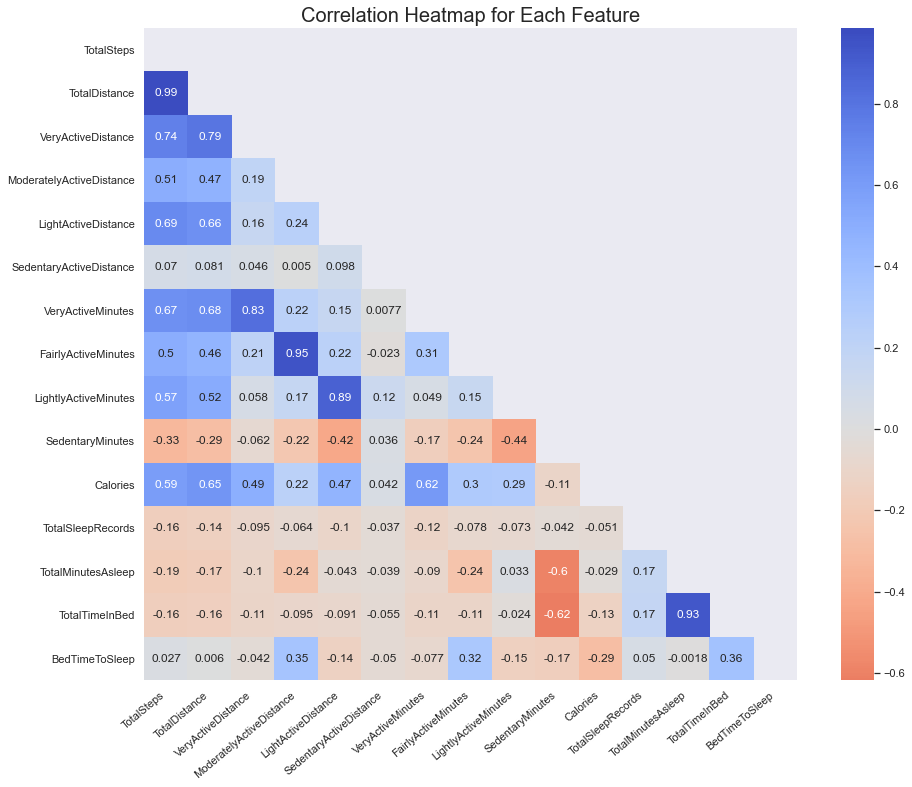

In [482]:
# mask variable to mask upper triangle of the heatmap
mask = np.triu(da_complete.drop(["Id","TrackerDistance", "LoggedActivitiesDistance"], axis=1).corr())

# heatmap
sns.set(rc={'figure.figsize':(16,12)})
fig, ax = plt.subplots()
ax = sns.heatmap(
    da_complete.drop(["Id","TrackerDistance", "LoggedActivitiesDistance"], axis=1).corr(), annot=True, cmap='coolwarm_r', 
    center=0,
    square=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,
    horizontalalignment='right'
)
ax.set_title("Correlation Heatmap for Each Feature", fontsize=20)
fig.savefig(os.path.join('../image/','heatmap.png'))

### Point of Interest
- There's a quite strong negative correlation between "*SedetaryMinutes*" with both "*TotalMinutesAsleep*" and "*TotalTimeInBed*".
- Following from the previous point, "*TotalTimeInBed*" is always greater than "*TotalMinutesAsleep*" (They are very correlated to each other). We can get the time needed for users to go to sleep by subtracting "*TotalMinutesAsleep*" from "*TotalTimeInBed*" after grouping them using "*TotalSleepRecords*". This could lead into an interesting findings.
- We have couple of significant variables that contributes to calories burned in a day; "*TotalSteps*", "*TotalDistance*", "*VeryActiveMinutes*", "*VeryActiveDistance*", and "*LightActiveDistance*". It is interesting to see the correlation between light active to calories is greater than moderately active to calories. We can emphasize on encouraging our users to be "very active" but when they do get tired, be "lighty active" instead of a half-half method (moderately active).

In [321]:
# add time (in minutes) in bed to sleep
da_complete["BedTimeToSleep"] = da_complete["TotalTimeInBed"] - da_complete["TotalMinutesAsleep"]

In [322]:
da_complete["BedTimeToSleep"].describe()

count    413.000000
mean      39.171913
std       46.570095
min        0.000000
25%       17.000000
50%       25.000000
75%       40.000000
max      371.000000
Name: BedTimeToSleep, dtype: float64

In [474]:
da_complete.groupby("TotalSleepRecords").agg({"BedTimeToSleep": "mean"})

,BedTimeToSleep
TotalSleepRecords,
1.0,38.261580
2.0,46.953488
3.0,39.000000


Our user needs 38 minutes in bed on average before they go to sleep.

*#note that I only consider users with sleep records of 1. Including the rest (2 and 3) wouldn't be an accurate estimation since this number indicate how many times the user go to bed (in order to sleep).*

In [367]:
# grouped users based on active time tracked by the app
conditions = [
    np.array(da_complete["SedentaryMinutes"]>np.mean(da_complete["SedentaryMinutes"])) & 
     np.array(da_complete["LightlyActiveMinutes"]<np.mean(da_complete["LightlyActiveMinutes"])) &
     np.array(da_complete["FairlyActiveMinutes"]<np.mean(da_complete["FairlyActiveMinutes"])) &
     np.array(da_complete["VeryActiveMinutes"]<np.mean(da_complete["VeryActiveMinutes"])),
    np.array(da_complete["SedentaryMinutes"]<np.mean(da_complete["SedentaryMinutes"])) &
     np.array(da_complete["LightlyActiveMinutes"]>np.mean(da_complete["LightlyActiveMinutes"])) &
     np.array(da_complete["FairlyActiveMinutes"]<np.mean(da_complete["FairlyActiveMinutes"])) &
     np.array(da_complete["VeryActiveMinutes"]<np.mean(da_complete["VeryActiveMinutes"])),
    np.array(da_complete["SedentaryMinutes"]<np.mean(da_complete["SedentaryMinutes"])) &
     np.array(da_complete["LightlyActiveMinutes"]<np.mean(da_complete["LightlyActiveMinutes"])) &
     np.array(da_complete["FairlyActiveMinutes"]>np.mean(da_complete["FairlyActiveMinutes"])) &
     np.array(da_complete["VeryActiveMinutes"]<np.mean(da_complete["VeryActiveMinutes"])),
    np.array(da_complete["SedentaryMinutes"]<np.mean(da_complete["SedentaryMinutes"])) &
     np.array(da_complete["LightlyActiveMinutes"]<np.mean(da_complete["LightlyActiveMinutes"])) &
     np.array(da_complete["FairlyActiveMinutes"]<np.mean(da_complete["FairlyActiveMinutes"])) &
     np.array(da_complete["VeryActiveMinutes"]>np.mean(da_complete["VeryActiveMinutes"]))
]
values = ["Sedentary", "LightActive", "FairlyActive", "VeryActive"]

# new column
da_complete["ActiveType"] = np.select(conditions, values)

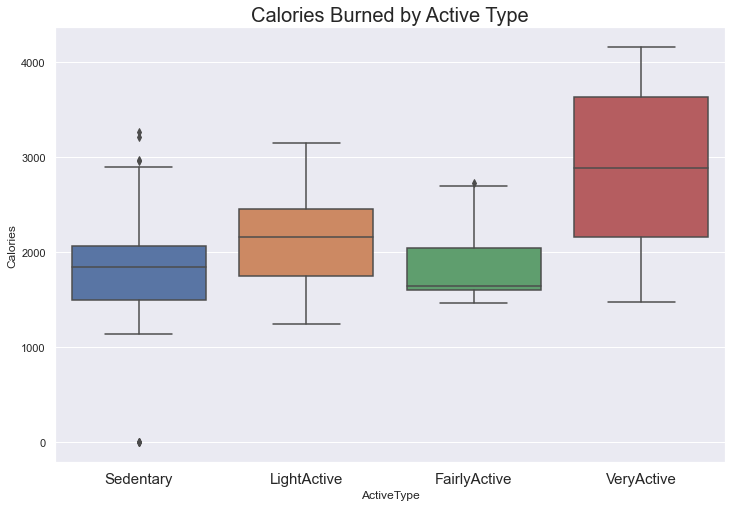

In [483]:
sns.set(rc={'figure.figsize':(12,8)})

fig, ax = plt.subplots()
ax = sns.boxplot(y="Calories", x="ActiveType", data=da_complete[da_complete["ActiveType"] != "0"], order=values)
ax.tick_params(axis ="x", labelsize=15)
ax.set_title("Calories Burned by Active Type", fontsize=20)
fig.savefig(os.path.join('../image/','caloriesbyactivetype.png'))

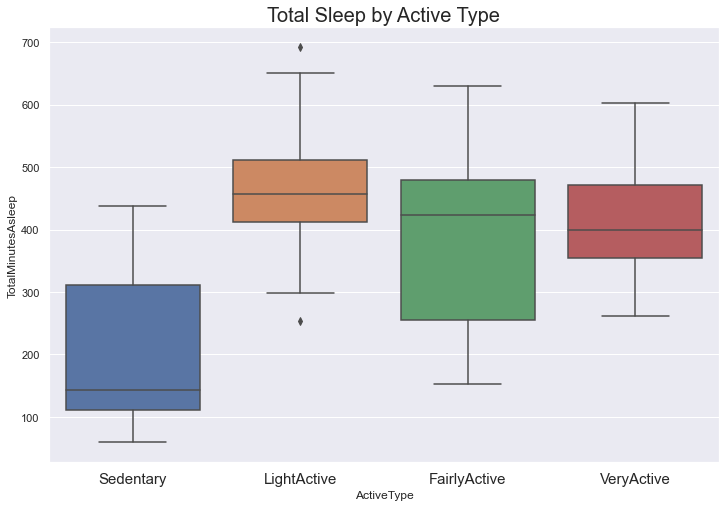

In [484]:
fig, ax = plt.subplots()
ax = sns.boxplot(y="TotalMinutesAsleep", x="ActiveType", data=da_complete[da_complete["ActiveType"] != "0"], order=values)
ax.tick_params(axis ="x", labelsize=15)
ax.set_title("Total Sleep by Active Type", fontsize=20)
fig.savefig(os.path.join('../image/','sleepbyactivetype.png'))

## Inferences
- First boxplot confirms the significance of very active activities to the number of calories burned.
- The second boxplot confirms the negative correlation between sedentary period and and total minutes asleep. We can conclude that if one wants to increase the quality of sleep during the day, one should reduce their sedentary period during the day and start doing a light activities such as simple walking, jogging, walking dog, etc.

In [486]:
# grouped users based on number of steps tracked by the app
conditions = [
    np.array(da_complete["TotalSteps"]<5000),
    np.array(da_complete["TotalSteps"]<7499) & np.array(da_complete["TotalSteps"]>5000),
    np.array(da_complete["TotalSteps"]<9999) & np.array(da_complete["TotalSteps"]>7500),
    np.array(da_complete["TotalSteps"]>10000)
]
values = ["Less than 5k", "Between 5K and 7.5k", "Between 7.5k and 10k", "More than 10k"]

# new column
da_complete["StepType"] = np.select(conditions, values)

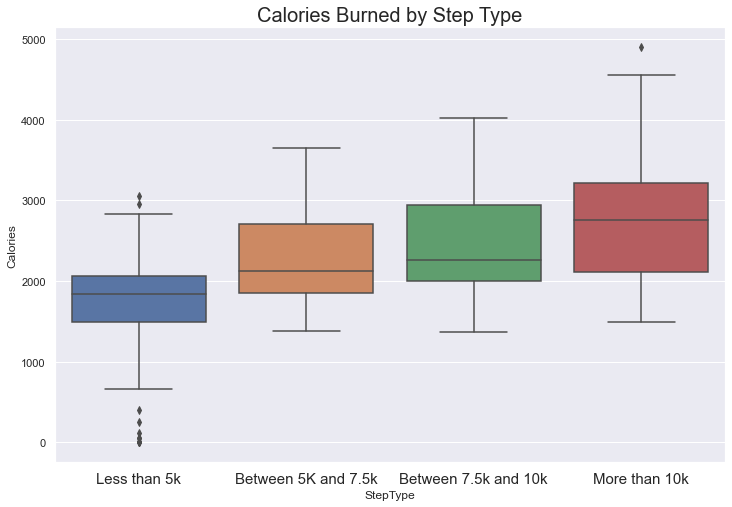

In [487]:
fig, ax = plt.subplots()
ax = sns.boxplot(y="Calories", x="StepType", data=da_complete, order=values)
ax.tick_params(axis ="x", labelsize=15)
ax.set_title("Calories Burned by Step Type", fontsize=20)
fig.savefig(os.path.join('../image/','caloriesbysteptype.png'))

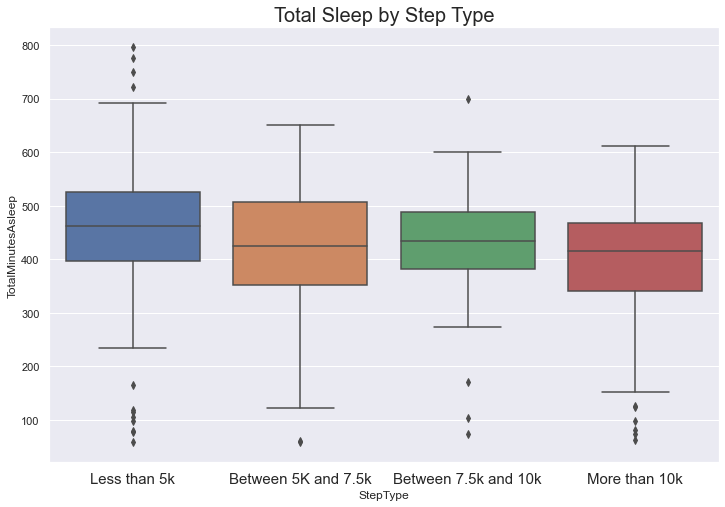

In [488]:
fig, ax = plt.subplots()
ax = sns.boxplot(y="TotalMinutesAsleep", x="StepType", data=da_complete, order=values)
ax.tick_params(axis ="x", labelsize=15)
ax.set_title("Total Sleep by Step Type", fontsize=20)
fig.savefig(os.path.join('../image/','caloriesbysteptype.png'))

## Inferences
- First boxplot only confirms the more steps we take the more calories we burn.

I would also be interested to see the time (in hour) where our users are most active.

In [400]:
intensities_hourly.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [401]:
intensities_hourly["time"] = intensities_hourly["ActivityHour"].apply(lambda x: x.split()[1] + " " + x.split()[2])

In [402]:
intensities_hourly.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,time
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333,12:00:00 AM
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333,1:00:00 AM
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667,2:00:00 AM
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000,3:00:00 AM
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000,4:00:00 AM


In [452]:
avg_totintensities = intensities_hourly.groupby("time").agg({"TotalIntensity": "mean"})

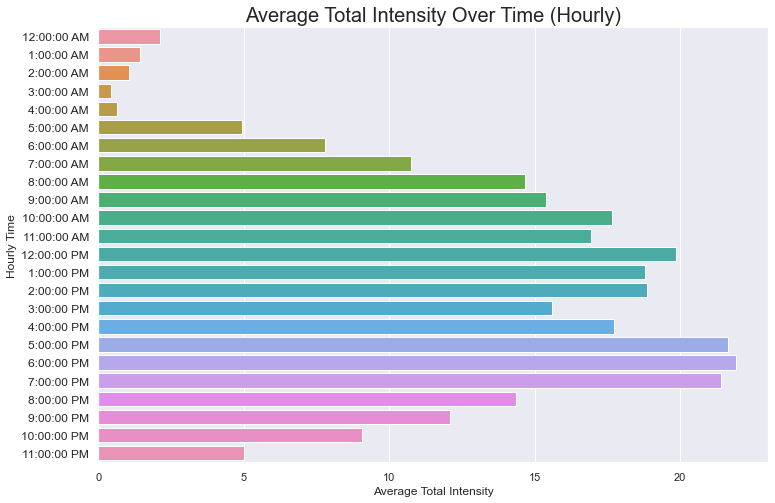

In [489]:
fig, ax = plt.subplots()
hour_order=['12:00:00 AM', '1:00:00 AM', '2:00:00 AM', '3:00:00 AM',
           '4:00:00 AM', '5:00:00 AM', '6:00:00 AM', '7:00:00 AM', '8:00:00 AM',
           '9:00:00 AM', '10:00:00 AM', '11:00:00 AM', '12:00:00 PM', '1:00:00 PM',
           '2:00:00 PM', '3:00:00 PM', '4:00:00 PM', '5:00:00 PM', '6:00:00 PM',
           '7:00:00 PM', '8:00:00 PM', '9:00:00 PM', '10:00:00 PM', '11:00:00 PM']
ax = sns.barplot(x="TotalIntensity", y=avg_totintensities["TotalIntensity"].index, data=avg_totintensities, order=hour_order)
ax.set_title("Average Total Intensity Over Time (Hourly)", fontsize=20)
ax.set(xlabel="Average Total Intensity", ylabel = "Hourly Time")
ax.tick_params(axis ="y", labelsize=12)
fig.savefig(os.path.join('../image/','avg_intensity_hourly.png'))

## Inferences
- From this graph, we can make an assumption that between 5-7 PM, is the time where our users do most of their physical activities.

## Conclusion
Target Audience: Women

- Bellabeat User Trends
    - Daily total steps are **7652** step on average.
    - Most of our users are categorized as lightly active (1-6 miles daily), with average of **5.5** miles a day.
    - Our users spends around **990 minutes** (16 hours and 30 minutes) doing very little physical activities.
    - On average, our users spend in total of **7 hours** of sleep daily.
    - Our users burn **2308 calories** on average daily.
    - It takes approximately **38 minutes** in bed for our users to be fully asleep.
- Inferences & Assumptions
    - Clear negative relation between *Sedentary Time* and *Time Asleep*, which emphasizes on the importance of physical acitivies. As we do more activities (that is reducing *Sedentary Time*), the more we can increase our quality of sleep.
    - Clear positive relation between *Higher Intensity Activities* and *Calories Burned*, which indicates the more we participate in higher intensity activities, the more calories we burn.
        - In this case, *Higher Intensity Activities* refers to the increase amount of "*TotalSteps*", "*TotalDistance*", "*VeryActiveMinutes*", "*VeryActiveDistance*", and "*LightActiveDistance*".
    - Between 5 PM - 7 PM is the time where most of our user do *High Intensity Activities*.

## Recommendation to the Business

- Establish an optimal daily steps, daily calories, and daily sleep guidance metrics according to user's goal (maintain health, lose weight, etc.) For example, a simple google search on "optimal daily steps" brings me to the fact that 4400 steps a day is associated to 41% reduction in mortality.
- Encourage our users to reduce their sedentary period during the day to improve overall sleep quality. One idea would be adding a simple message in the app that says "1 hour of walking could lead to a better sleep quality", along with the 5 PM - 7 PM daily notification to start doing physical activities.
- Most importantly, encourage people to use our app by emphasizing the importance of tracking our personal data. We are more likely to be aware of our body condition if we have tangible numbers to work with.
- Consider adding health recipes section to the website and/or the app for people who don't have the time to exercise. i.e. too busy to exerciise but still want to decrease calories per day, we can provide them with health meal options to reduce their calories intake

## Additional Data to be Explored
I do think the data needs to be added for trends and patterns to emerge. The data below still lacks significance as a result of missing data, inconsistent user input, etc.

In [462]:
# weight
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [377]:
# metabolic equivalent of task
met_minute.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016,10
1,1503960366,4/12/2016,10
2,1503960366,4/12/2016,10
3,1503960366,4/12/2016,10
4,1503960366,4/12/2016,10


In [465]:
avg_met = met_minute.groupby("Id").agg({"METs": "mean"})

In [466]:
avg_met.head()

,METs
Id,
1503960366,16.668550
1624580081,12.522011
1644430081,14.107674
1844505072,11.877975
1927972279,10.648279


In [47]:
# heart rate per second
heart_rate_second.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [48]:
heart_rate_second["Id"].unique()

array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443, 5577150313, 6117666160, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391], dtype=int64)

Using this data, I would be interested in tracking different distributions of heart rate to for each Id to make a better overall understanding on exercise benefit. But due to the lack of data we cannot make any generalize conclusions using this information. For further analysis, if we do have the complete heart rate data for each participant Id, we can add these numbers into daily_activity data and create a more sophisticated analysis. 

But it is still be worth to show the aggregated value.

In [348]:
heart_rate_second.groupby("Id").agg(["mean", "std", "sum", "max", "min"])

Value                              
                 mean        std       sum  max min
Id                                                 
2022484408  80.236860  17.595586  12364821  203  38
2026352035  93.776305  12.610530    233503  125  63
2347167796  76.722792  15.515708  11714266  195  49
4020332650  82.300577  15.911590  23493605  191  46
4388161847  66.132998  15.847277  16516584  180  39
4558609924  81.673947  14.134071  15695119  199  44
5553957443  68.633093  14.823102  17513381  165  47
5577150313  69.564516  20.959787  17290956  174  36
6117666160  83.749891  14.119755  13307774  189  52
6775888955  92.029630  17.604449   3015903  177  55
6962181067  77.724045  17.002701  20699934  184  47
7007744171  91.123795  13.985928  12173410  166  54
8792009665  72.487484  13.714313   8904435  158  43
8877689391  83.611184  30.601735  19133667  180  46

### Data Source
Check the complete scenario and the data from [Kaggle](https://www.kaggle.com/arashnic/fitbit).